### About this Notebook 
This notebook uses different models for sentiment analysis. 

### Objective 
Classify tweets into positive and negative groups. 

### References
- This notebook uses the following resources: List of positive/negative keywords: Downloaded from 
   [Prof. Bing Liu's Course](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon)

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.metrics import classification_report

In [3]:
# Counting the number of negative and positive examples
def count_examples(data_list, column): 
    label_list = [] 
    for label in data_list[column].unique(): 
        label_list.append(data_list[data_list[column]==label].shape[0])
    return label_list

In [4]:
data = pd.read_csv('../dataset/training.1600000.processed.noemoticon.csv', header=None, encoding = "ISO-8859-1")
#dataset columns: sentm, tweet_id, tweet_date, flag, username, tweet
data.columns = ['target', 'tweet_id', 'tweet_date', 'flag', 'username', 'tweet']
data.head(10)

,target,tweet_id,tweet_date,flag,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
print('The number of tweets:', data.shape[0])
print('The number of unique usernames', data['username'].nunique())

The number of tweets: 1600000
The number of unique usernames 659775


([<matplotlib.patches.Wedge at 0x7fa73a140208>,
 [Text(-1.1, 1.3471114790620887e-16, '0:Negative'),
  Text(1.1, -2.6942229581241775e-16, '4: Positive')],
 [Text(-0.6, 7.347880794884119e-17, '50.0%'),
  Text(0.6, -1.4695761589768238e-16, '50.0%')])

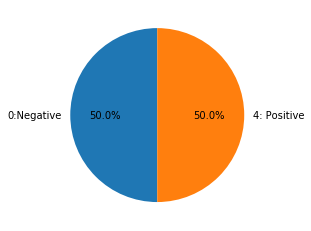

In [323]:
labels = count_examples(data, 'target')
# Plot the distribution of negative and positive tweets
plt.pie(labels,labels=['0:Negative', '4: Positive'], autopct='%1.1f%%', startangle=90)

# 1. Classifying Tweets based on Word Counts

![library.png](images/library.png)

In [324]:
# Load positive words
positive_keywords = pd.read_csv('../dataset/positive-keywords.txt', header=None, encoding = "ISO-8859-1")
# Load negative words
negative_keywords = pd.read_csv('../dataset/negative-keywords.txt', header=None, encoding = "ISO-8859-1")

In [325]:
print('Number of positive words in the dictionary', positive_keywords.nunique())
print('Number of negative words in the dictionary', negative_keywords.nunique())

Number of positive words in the dictionary 0    2050
dtype: int64
Number of negative words in the dictionary 0    4833
dtype: int64


In [326]:
positive_keywords[0]

0                a+
1            abound
2           abounds
3         abundance
4          abundant
           ...     
2130      surprised
2131           love
2132           glad
2133            yum
2134    interesting
Name: 0, Length: 2135, dtype: object

In [327]:
if 'mad' in list(negative_keywords[0]):
    print('Yes')

Yes


In [328]:
# We need to use regular expression for sring comparisons.
def classify_word_counts(dataset, positive_keywords, negative_keywords):
    # list of predictions
    predictions = []
    for tweet in dataset['tweet']: 
        positive_count, negative_count = 0, 0
        for word in tweet.split():
            word = re.sub(r'[^a-zA-Z]', "", word)
            if word in positive_keywords:
                positive_count += 1
            elif word in negative_keywords:
                negative_count += 1
        if positive_count >= negative_count: 
            prediction = 4
        else: 
            prediction = 0
        predictions.append(prediction)
    return predictions

In [330]:
%%time
predictions = classify_word_counts(data, list(positive_keywords[0]), list(negative_keywords[0]))

CPU times: user 20min 35s, sys: 956 ms, total: 20min 36s
Wall time: 20min 36s


([<matplotlib.patches.Wedge at 0x7fa738e748d0>,
 [Text(-0.7025201538437686, -0.8464428116791634, '0:Negative'),
  Text(0.7025201538437688, 0.8464428116791634, '4: Positive')],
 [Text(-0.38319281118751014, -0.4616960790977254, '77.9%'),
  Text(0.3831928111875102, 0.4616960790977254, '22.1%')])

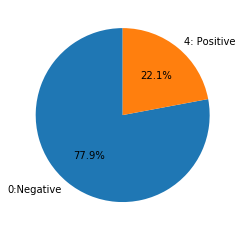

In [331]:
labels = count_examples(pd.DataFrame(predictions), 0)
# Plot the distribution of the predicted negative and positive tweets
plt.pie(labels,labels=['0:Negative', '4: Positive'], autopct='%1.1f%%', startangle=90)

### Evaluating the predictions

In [334]:
print(classification_report(data['target'], predictions))

              precision    recall  f1-score   support

           0       0.77      0.34      0.47    800000
           4       0.58      0.90      0.70    800000

    accuracy                           0.62   1600000
   macro avg       0.67      0.62      0.59   1600000
weighted avg       0.67      0.62      0.59   1600000



In [335]:
correct = sum([1 for p, actual in zip(predictions, data['target']) if p == actual]) * 100.0 / len(predictions)
print ('Correct predicted examples = ', correct)

Correct predicted examples =  61.992375


# 2. Classifying Tweets Using W2V Model

In [29]:
from keras.models import Sequential, load_model
from keras.layers import Dense
import sys
import random
import numpy as np

Using TensorFlow backend.
/Users/mohammedalhamid/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mohammedalhamid/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mohammedalhamid/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [30]:
# Keras Libraries 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
# The following libraries would be used for downloading stopwords. 
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer


In [32]:
# Word2vec
import gensim
import re
import os
from collections import Counter
import logging
import time
import pickle
import itertools

In [36]:
# Downloading stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammedalhamid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [38]:
# Model Parameters
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

In [39]:
# WORD2VEC Parameters
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10


In [40]:
# Sentiment Threshold
SENTIMENT_THRESHOLDS = (0.4, 0.7)

In [41]:
def preprocess(text, stem=False):
    # The text of the tweets contain characters that need to be taken out such as links, mentions, etc. 
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)


In [42]:
# We will use regular expression to clean non-alphaptic characters. 
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [43]:
texts = data.tweet.apply(lambda x: preprocess(x))

In [44]:
data['text'] = texts

In [45]:
data.head(10)

,target,tweet_id,tweet_date,flag,username,tweet,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving mad see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rains bit bit lol fine t...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que muera


#### Splitting the data into training/testing sets 

In [152]:
# Splitting the dataset into training/testing
train_df, test_df = train_test_split(data, test_size=0.2, random_state=10)
print("TRAIN size:", len(train_df))
print("TEST size:", len(test_df))

TRAIN size: 1280000
TEST size: 320000


In [153]:
test_df.head(3)


,target,tweet_id,tweet_date,flag,username,tweet,text
685610,0,2250819430,Sat Jun 20 01:34:59 PDT 2009,NO_QUERY,The_Khristos,"@MrDAprano, honnestly I'm not going to miss th...",honnestly going miss janitor show seriously lo...
446784,0,2068515884,Sun Jun 07 14:12:53 PDT 2009,NO_QUERY,teale,Tired after spending a restless night with Tie...,tired spending restless night tiernan doctors ...
1231978,4,1991871464,Mon Jun 01 07:48:38 PDT 2009,NO_QUERY,jenjeahaly,@bradgallaway Yup popiscle Not sure if you've...,yup popiscle sure got strawberry splits strawb...


In [48]:
#Creating the words vector 
documents = [content.split() for content in train_df.text] 


In [49]:
train_df.iloc[0]['text']

'yeah hmmmm laying low guess u ever wait till last minute like ugh going'

In [50]:
documents[0]


['yeah',
 'hmmmm',
 'laying',
 'low',
 'guess',
 'u',
 'ever',
 'wait',
 'till',
 'last',
 'minute',
 'like',
 'ugh',
 'going']

In [208]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [211]:
# Building the Word2Vec model
w2v_model.build_vocab(documents)

In [212]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)


Vocab size 30319


In [213]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)


CPU times: user 12min 6s, sys: 3.12 s, total: 12min 9s
Wall time: 2min 43s


(263177483, 295306560)

In [52]:
# In case the kernel got interuppted, the next command load the word2vec model 
# You need to uncomment the next line
#w2v_model = gensim.models.Word2Vec.load("../models/model.w2v")

In [53]:
# Testing the Word2Vec model 
w2v_model.most_similar("book")


/Users/mohammedalhamid/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('books', 0.6352506875991821),
 ('novel', 0.5369108319282532),
 ('fanfic', 0.4880465269088745),
 ('ebook', 0.473657488822937),
 ('manga', 0.4569568634033203),
 ('novels', 0.44363638758659363),
 ('chapter', 0.43370991945266724),
 ('eclipse', 0.42632341384887695),
 ('stackhouse', 0.4200648367404938),
 ('fic', 0.4019091725349426)]

#### Tokenizing the tweet texts

In [154]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df.text)
vocab_size = len(tokenizer.word_index) + 1
print("The size of the vocabulary", vocab_size)

The size of the vocabulary 290429
CPU times: user 14.8 s, sys: 35.6 ms, total: 14.8 s
Wall time: 14.8 s


In [155]:
%%time
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df.text), maxlen=SEQUENCE_LENGTH)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df.text), maxlen=SEQUENCE_LENGTH)

CPU times: user 21.3 s, sys: 351 ms, total: 21.7 s
Wall time: 21.7 s


In [156]:
# Labels
labels = train_df.target.unique().tolist()
labels

[0, 4]

In [140]:
encoder = LabelEncoder()
encoder.fit(train_df.target.tolist())

y_train = encoder.transform(train_df.target.tolist())
y_test = encoder.transform(test_df.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (1280000, 1)
y_test (320000, 1)


In [142]:
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1280000, 300)
y_train (1280000, 1)

x_test (320000, 300)
y_test (320000, 1)


In [360]:
y_train.shape

(1280000, 1)

In [69]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290429, 300)


In [77]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [244]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          87128700  
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 87,289,201
Trainable params: 160,501
Non-trainable params: 87,128,700
_________________________________________________________________


In [245]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [248]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [249]:
%%time
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 1152000 samples, validate on 128000 samples
Epoch 1/8
1152000/1152000 [==============================] - 2784s 2ms/step - loss: 0.5042 - acc: 0.7501 - val_loss: 0.4641 - val_acc: 0.7811
Epoch 2/8
1152000/1152000 [==============================] - 2883s 3ms/step - loss: 0.4870 - acc: 0.7628 - val_loss: 0.4578 - val_acc: 0.7847
Epoch 3/8
1152000/1152000 [==============================] - 3419s 3ms/step - loss: 0.4773 - acc: 0.7688 - val_loss: 0.4524 - val_acc: 0.7877
Epoch 4/8
1152000/1152000 [==============================] - 3981s 3ms/step - loss: 0.4722 - acc: 0.7717 - val_loss: 0.4501 - val_acc: 0.7883
Epoch 5/8
1152000/1152000 [==============================] - 5305s 5ms/step - loss: 0.4698 - acc: 0.7738 - val_loss: 0.4475 - val_acc: 0.7902
Epoch 6/8
1152000/1152000 [==============================] - 3214s 3ms/step - loss: 0.4676 - acc: 0.7750 - val_loss: 0.4446 - val_acc: 0.7911
Epoch 7/8
1152000/1152000 [====================

#### Saving all models

In [251]:
# Save Model: 
model.save("../models/model.h5")
w2v_model.save("../models/model.w2v")
pickle.dump(tokenizer, open("../models/tokenizer.pkl", "wb"), protocol=0)
pickle.dump(encoder, open("../models/encoder.pkl", "wb"), protocol=0)

In [361]:
# In case the kernel got interuppted, the next command load the word2vec model 
# You need to uncomment the next line
# model_2 = load_model('model.h5')

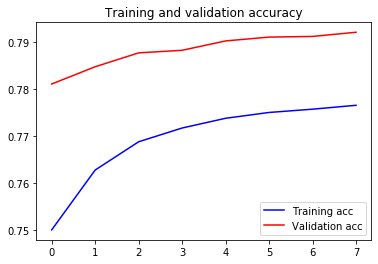

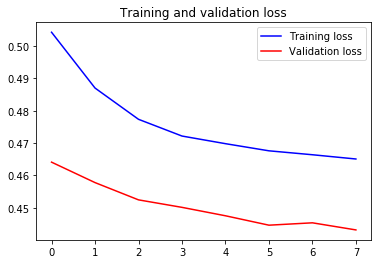

In [365]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

### Evaluation

In [299]:
%%time
score = model_2.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print('Accuracy and Inference Time')
print("ACCURACY:",score[1])
print("LOSS:",score[0])

320000/320000 [==============================] - 264s 824us/step
Accuracy and Inference Time
ACCURACY: 0.78823125
LOSS: 0.4474306486129761
CPU times: user 50min 56s, sys: 3min 11s, total: 54min 7s
Wall time: 4min 23s


In [255]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [370]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = 2
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = 0
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = 4

        return label
    else:
        return 0 if score < 0.5 else 4

In [371]:
predict("I love the music")

{'label': 4, 'score': 0.9714024662971497, 'elapsed_time': 0.04391789436340332}

In [372]:
predict("I don't like exams")

{'label': 0,
 'score': 0.36275821924209595,
 'elapsed_time': 0.034641265869140625}

In [369]:
%%time
y_pred_m2 = []
y_test_m2 = list(test_df.target)
scores = model_2.predict(x_test, verbose=1, batch_size=8000)
y_pred_m2 = [decode_sentiment(score, include_neutral=False) for score in scores]

320000/320000 [==============================] - 304s 950us/step
CPU times: user 57min 56s, sys: 8min 46s, total: 1h 6min 42s
Wall time: 5min 4s


In [273]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [373]:
print(classification_report(y_test_m2, y_pred_m2))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79    159835
           4       0.78      0.80      0.79    160165

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



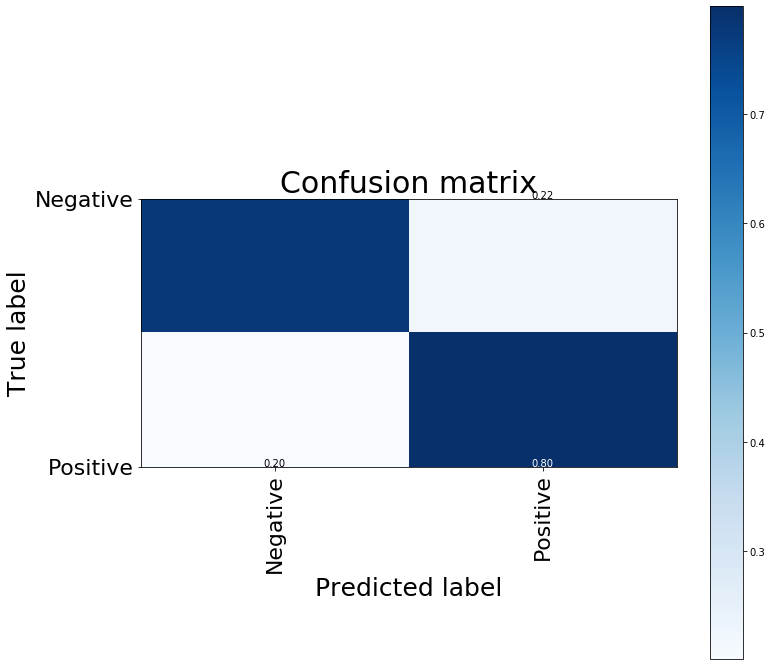

CPU times: user 3.6 s, sys: 40.2 ms, total: 3.64 s
Wall time: 499 ms


In [280]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=['Negative = 0', 'Positive = 4'], title="Confusion matrix")
plt.show()

In [374]:
acc_model2 = accuracy_score(y_test_1d, y_pred_1d)

### Progress of the model performance

In [390]:
def plot_models_performance(labels, accuracies): 

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Accuracy achieved by each model')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)

    fig.tight_layout()

    plt.show()

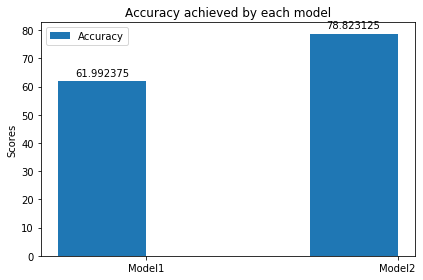

In [393]:
plot_models_performance(['Model1', 'Model2'], [correct, acc_model2 * 100])

# 3. Classifying Tweets using Convolutional Neural Network 

We will continoue on the preprocessing steps done in Step2. 

In [130]:
from keras.layers import Input, GlobalMaxPooling1D, concatenate
from keras.models import Model

In [159]:
data.head(3)

,target,tweet_id,tweet_date,flag,username,tweet,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...


Before we build the CNN model, we need to make the problem a binary classification and use one-hot encoding of the labels. 

In [160]:
train_df.head(5)

,target,tweet_id,tweet_date,flag,username,tweet,text
684663,0,2250576251,Sat Jun 20 00:53:58 PDT 2009,NO_QUERY,ivansharris,@DJGigiDred yeah...hmmmm I'm laying low I gues...,yeah hmmmm laying low guess u ever wait till l...
1582042,4,2190266976,Tue Jun 16 02:14:24 PDT 2009,NO_QUERY,holy_ostrich,i'm so excited for the new @Everyday_Sunday CD...,excited new everyday sunday cd released today ...
961181,4,1827007614,Sun May 17 09:47:35 PDT 2009,NO_QUERY,ccthedj,Good morning to all the tweeps in tworld! Mali...,good morning tweeps tworld malibu strings biki...
296783,0,1997215575,Mon Jun 01 16:27:32 PDT 2009,NO_QUERY,AndreanneMB,I'm feeling sooo sick and i'm so stressed abou...,feeling sooo sick stressed exams tomorrow
13957,0,1553485864,Sat Apr 18 14:23:46 PDT 2009,NO_QUERY,night867,@nmfirelover I know the feeling about getting ...,know feeling getting coworkers sick oh well th...


In [169]:
def reshape_target(dataset):# We will add two columns representing the positive/negative tweets
    new_pos_col = [] 
    new_neg_col = []

    for target in dataset['target']: 
        if  target == 0:
            #label (1,0)
            new_neg_col.append(1)
            new_pos_col.append(0)
        else: 
            #label (0,1)
            new_neg_col.append(0)
            new_pos_col.append(1)

    dataset['neg'] = new_neg_col
    dataset['pos'] = new_pos_col

In [170]:
reshape_target(train_df)
train_df.head(3)

/Users/mohammedalhamid/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/mohammedalhamid/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,target,tweet_id,tweet_date,flag,username,tweet,text,neg,pos
684663,0,2250576251,Sat Jun 20 00:53:58 PDT 2009,NO_QUERY,ivansharris,@DJGigiDred yeah...hmmmm I'm laying low I gues...,yeah hmmmm laying low guess u ever wait till l...,1,0
1582042,4,2190266976,Tue Jun 16 02:14:24 PDT 2009,NO_QUERY,holy_ostrich,i'm so excited for the new @Everyday_Sunday CD...,excited new everyday sunday cd released today ...,0,1
961181,4,1827007614,Sun May 17 09:47:35 PDT 2009,NO_QUERY,ccthedj,Good morning to all the tweeps in tworld! Mali...,good morning tweeps tworld malibu strings biki...,0,1


In [171]:
y_train = train_df[['neg', 'pos']]
y_train

,neg,pos
684663,1,0
1582042,0,1
961181,0,1
296783,1,0
13957,1,0
...,...,...
1154171,0,1
617841,1,0
1492288,0,1
1048548,0,1


In [172]:
def build_CNN(embedding_layer, sequence_max_len, vocab_size, labels_index):
    
    sequence_input = Input(shape=(sequence_max_len,), dtype='int32')
    embedded_sequence = embedding_layer(sequence_input)
    
    convs = []
    filter_sizes = [2,3,4,5,6]
    
    for filter_size in filter_sizes: 
        l_conv = Conv1D(filters = 200, kernel_size=filter_size, activation='relu')(embedded_sequence)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)
        
    l_merge = concatenate(convs, axis =1)
    
    x = Dropout(0.1)(l_merge)
    x = Dense(128, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation = 'sigmoid')(x)
    
    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    model.summary()
    return model

In [173]:
# Let's build the CNN model by calling the above created function

In [174]:
# We will use the vocabulary index calculated in step 2 
vocab_size

290429

In [175]:
print(embedding_matrix.shape)

(290429, 300)


In [176]:
SEQUENCE_LENGTH

300

In [177]:
model_3 = build_CNN(embedding_layer, SEQUENCE_LENGTH, vocab_size, 2)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 300)     87128700    input_12[0][0]                   
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, 299, 200)     120200      embedding_1[7][0]                
__________________________________________________________________________________________________
conv1d_24 (Conv1D)              (None, 298, 200)     180200      embedding_1[7][0]                
__________________________________________________________________________________________________
conv1d_25 

In [178]:
# Model Parameters
EPOCHS = 4
BATCH_SIZE = 1024

In [179]:
%%time
history_m3 = model_3.fit(X_train, y_train, batch_size= BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, 
                        shuffle=True)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 1152000 samples, validate on 128000 samples
Epoch 1/4
1152000/1152000 [==============================] - 50118s 44ms/step - loss: 0.4807 - acc: 0.7693 - val_loss: 0.4505 - val_acc: 0.7863
Epoch 2/4
1152000/1152000 [==============================] - 33401s 29ms/step - loss: 0.4477 - acc: 0.7887 - val_loss: 0.4443 - val_acc: 0.7905
Epoch 3/4
1152000/1152000 [==============================] - 6803s 6ms/step - loss: 0.4308 - acc: 0.7983 - val_loss: 0.4425 - val_acc: 0.7920
Epoch 4/4
1152000/1152000 [==============================] - 7102s 6ms/step - loss: 0.4130 - acc: 0.8080 - val_loss: 0.4457 - val_acc: 0.7897
CPU times: user 5d 2h 22min 19s, sys: 4h 44min 10s, total: 5d 7h 6min 30s
Wall time: 1d 3h 3min 44s


#### Saving up the model

In [180]:
model_3.save("../models/model_3.h5")

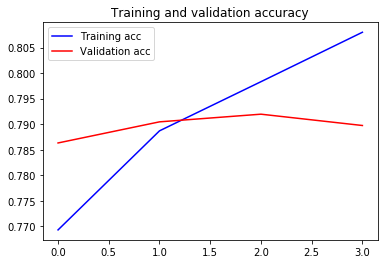

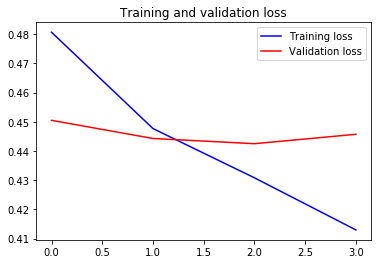

In [182]:
acc = history_m3.history['acc']
val_acc = history_m3.history['val_acc']
loss = history_m3.history['loss']
val_loss = history_m3.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()